### EDA on Crime Reports for City of Austin<a id='eda'>

## Contents<a id='Contents'></a>
* [EDA](#eda)
  * [Contents](#Contents)
    * [Imports](#imports)
    * [Load The Crime reports Data](#load_data)
    * [Choosing years 2018 to 2022 for EDA](#choose_years)
      * [EDA on Council Districts](#council_districts)
      * [EDA on APD sectors](#apd_sectors)
      * [EDA on zip_code](#zip_codes)
      * [Crime Count Visualization(yearly,monthly,daily, hourly)](#daily_crime)
      * [EDA on Clearance Status](#clearance_status)
  * [Time Series Analysis](#ts_analysis)
      * [Decomposition](#decomposition_ts)
  * [Summary of EDA](#summary)
     

#### Library Imports<a id='imports'>

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import requests
import time
import missingno as msno
import pyarrow as pa
import pyarrow.parquet as pq
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#### Load Data<a id='load_data'>

In [4]:
df_eda = pd.read_parquet('crime_reports_wrangled.parquet')

In [5]:
df_eda.head()

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,latitude,longitude,location,clearance_status,clearance_date,occurred_date_time,reported_date_time,month,year,hour
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,...,30.33748689,-97.70997634,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,...,30.3142963,-97.71996482,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,2023491425,THEFT,600,N,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,...,30.30467246,-97.71280824,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23
3,2023491475,TERRORISTIC THREAT,2704,N,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4,ID,8,...,30.33890768,-97.70200101,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2023-02-18 23:04:00,2023-02-18 23:04:00,February,2023,23
4,2023491472,DOC DISCHARGE GUN - PUB PLACE,2408,N,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3,HE,3,...,30.2290038,-97.70310131,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2023-02-18 23:03:00,2023-02-18 23:48:00,February,2023,23


In [6]:
df_eda.year.unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005'], dtype=object)

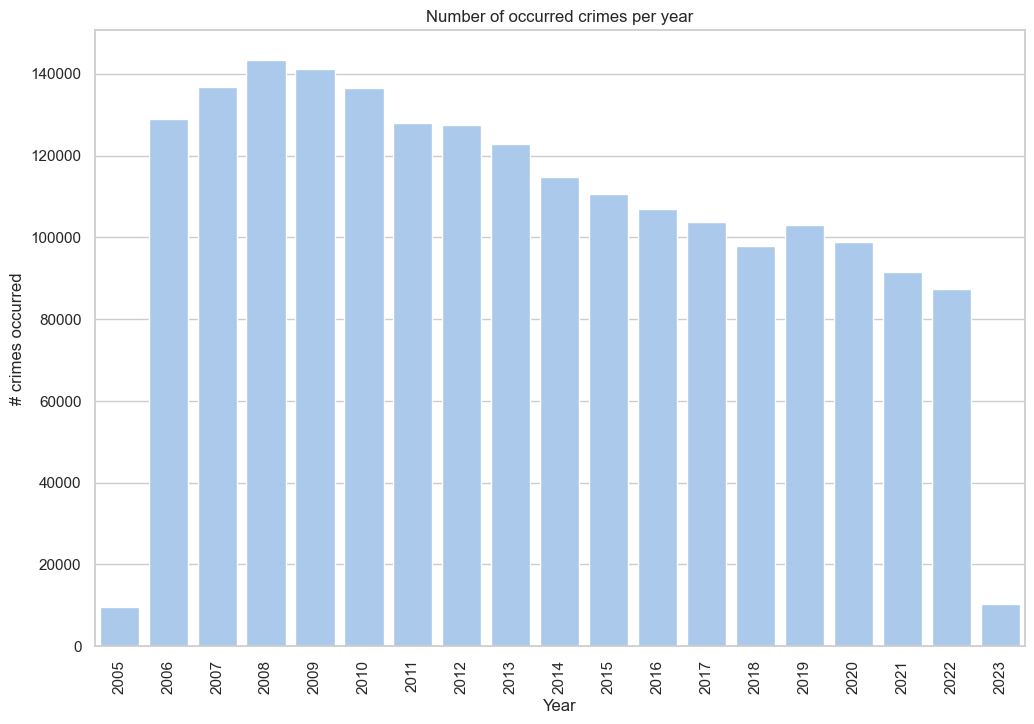

In [208]:
crimes_per_year = df_eda['year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes occurred')
plt.title('Number of occurred crimes per year')
plt.show()

### Choosing years 2018 to 2022 for EDA<a id='choose_years'>

In [32]:
df_18_22 = df_eda.query("year > '2017' and year < '2023'")

In [33]:
df_18_22.head()

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,latitude,longitude,location,clearance_status,clearance_date,occurred_date_time,reported_date_time,month,year,hour
10362,20238000022,THEFT,600,N,RESIDENCE / HOME,1804 ULLRICH AVE,78756,7,ID,7,...,30.33274275,-97.73728423,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-06T00:00:00.000,2022-12-31 23:55:00,2023-01-01 15:40:00,December,2022,23
10363,202310559,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,RESIDENCE / HOME,5121 CORNFLOWER DR,78739,8,DA,8,...,30.16858378,-97.88899989,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-11T00:00:00.000,2022-12-31 23:50:00,2023-01-01 09:35:00,December,2022,23
10364,20223651540,EVADING / FOOT,2723,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,NECHES ST / E 7TH ST,78701,9,GE,2,...,30.267699,-97.73792112,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-01-01T00:00:00.000,2022-12-31 23:49:00,2022-12-31 23:49:00,December,2022,23
10365,20223651539,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,12433 DESSAU RD,78754,1,ED,6,...,30.38973342,-97.64647729,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:48:00,2022-12-31 23:48:00,December,2022,23
10366,20223651533,AGG ASSAULT WITH MOTOR VEH,406,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,8244 RESEARCH BLVD SB,78758,7,ID,7,...,30.35570659,-97.71555725,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:45:00,2022-12-31 23:52:00,December,2022,23


In [37]:
df_18_22.shape

(478658, 24)

In [195]:
df_18_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478658 entries, 10362 to 489019
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_report_number  478658 non-null  object        
 1   crime_type              478658 non-null  object        
 2   ucr_code                478658 non-null  object        
 3   family_violence         478658 non-null  object        
 4   location_type           477532 non-null  object        
 5   address                 478657 non-null  object        
 6   zip_code                476894 non-null  object        
 7   council_district        474339 non-null  object        
 8   sector                  478070 non-null  object        
 9   district                477893 non-null  object        
 10  pra                     477416 non-null  object        
 11  census_tract            475885 non-null  object        
 12  x_coordinate            47

<AxesSubplot:>

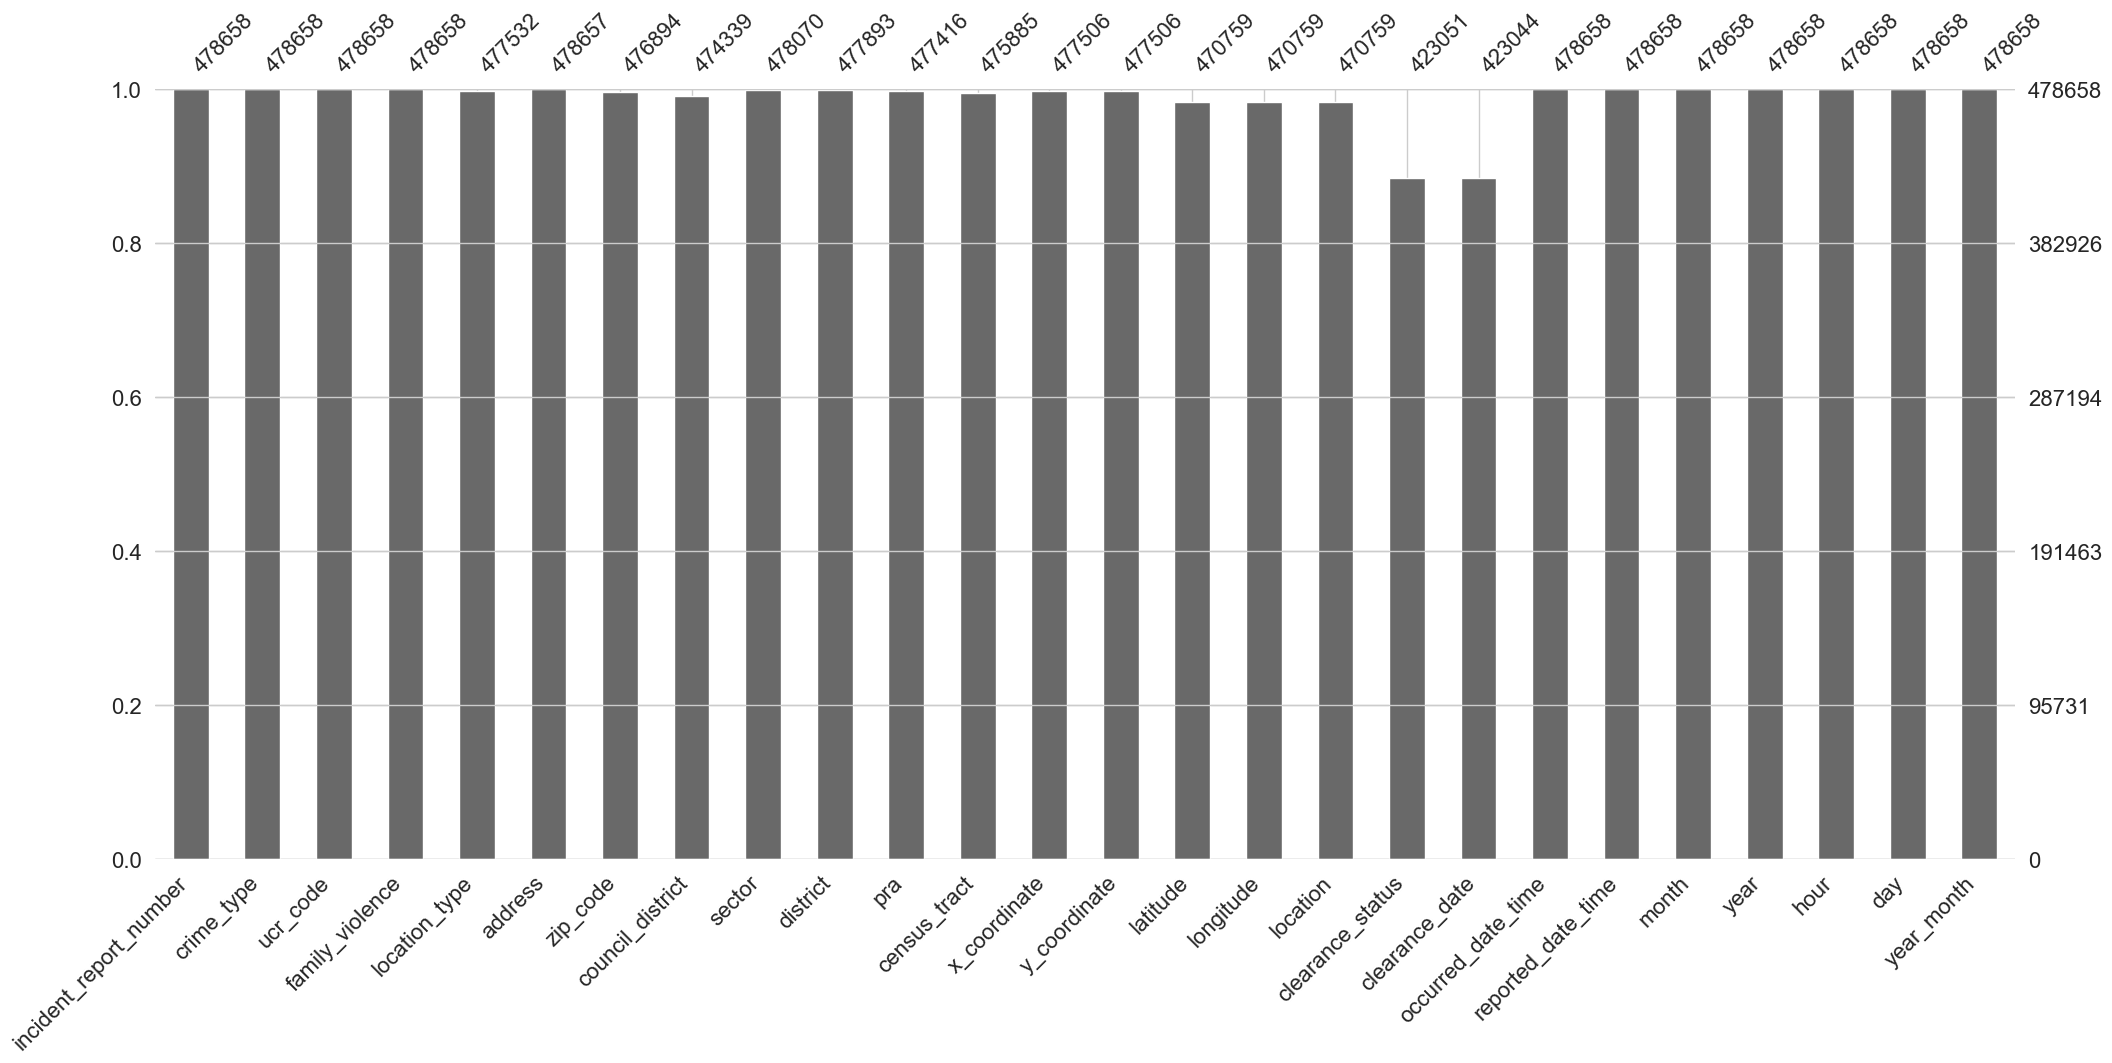

In [197]:
msno.bar(df_18_22)

I see some missing values for zip_codes which I want to explore the reason for those . 

In [203]:
df_18_22_nullzips = df_18_22.loc[df_18_22['zip_code'].isna()]

In [207]:
df_18_22_nullzips.loc[:,['incident_report_number', 'crime_type', 
        'location_type', 'address', 'zip_code', 'council_district',
       'sector', 'x_coordinate',
       'y_coordinate', 'latitude', 'longitude', 'location']]

,incident_report_number,crime_type,location_type,address,zip_code,council_district,sector,x_coordinate,y_coordinate,latitude,longitude,location
10474,20223650737,FAMILY DISTURBANCE,RESIDENCE / HOME,7033 ENTERPRISE CT,None,None,None,None,None,None,None,None
10673,20235002373,THEFT,CONSTRUCTION SITE,12489 N US 183 HWY SVRD SB,None,None,ADA<,None,None,None,None,None
10798,20225034861,PROTECTIVE ORDER,RESIDENCE / HOME,UNKNOWN,None,None,DA,None,None,None,None,None
10884,20223631437,EXPLOSIVE ORDNANCE DISPOSAL,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,19611 E TX 29,None,None,None,None,None,None,None,None
11226,20223640653,AUTO THEFT,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,CAMERON RD,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
488105,20185000472,PROTECTIVE ORDER,RESIDENCE / HOME,UNKNOWN,None,None,FR,None,None,None,None,None
488354,20185000316,PROTECTIVE ORDER,RESIDENCE / HOME,UNKNOWN,None,None,FR,None,None,None,None,None
488572,20185000188,PROTECTIVE ORDER,RESIDENCE / HOME,UNKNOWN,None,None,AD,None,None,None,None,None
488723,2021921245,RAPE,RESIDENCE / HOME,00 BLOCK DALLAS/AUSTIN,None,None,None,0,0,None,None,None


### EDA on Council Districts<a id='council_districts'>
    
    Which Council district has highest number of crime incidents in Austin?

In [38]:
df_18_22.council_district.unique()

array(['7', '8', '9', '1', '6', '2', '4', '5', '3', '10', None],
      dtype=object)

In [39]:
df_18_22.council_district.value_counts()

9     72591
3     69101
4     66888
7     55182
1     54021
2     46610
5     38599
6     27875
10    23057
8     20415
Name: council_district, dtype: int64

In [40]:
df_18_22.council_district.value_counts().info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 9 to 8
Series name: council_district
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [60]:
df_18_22.groupby(['year','council_district'])['council_district'].count().to_frame('count')\
.sort_values(by=['year','count'],ascending=([True,False]))

count
year council_district       
2018 9                 14960
     3                 14501
     4                 13462
     1                 11548
     7                 10597
     2                 10071
     5                  7753
     6                  5795
     8                  4294
     10                 4114
2019 9                 16344
     4                 15164
     3                 14591
     1                 11595
     7                 11472
     2                  9986
     5                  8398
     6                  6003
     10                 4420
     8                  4328
2020 4                 14306
     9                 14291
     3                 13985
     7                 11867
     1                 11256
     2                  9246
     5                  8243
     6                  5883
     10                 4914
     8                  4031
2021 9                 13916
     3                 13032
     4                 12434
     7                 11053
     1                 10075
     2                  8679
     5                  7379
     6                  5415
     10                 4812
     8                  3856
2022 9                 13080
     3                 12992
     4                 11522
     7                 10193
     1                  9547
     2                  8628
     5                  6826
     10                 4797
     6                  4779
     8                  3906

### Looks like council district 9 has more number of crimes. Let's visualize the council district 9 and other districts

In [79]:
# import folium package
import folium
from folium import plugins
# Map method of folium return Map object
 
# Here we pass coordinates of Gfg
# and starting Zoom level = 12
my_map1 = folium.Map(location = [30.27536, -97.73221],zoom_start = 12 )
# CircleMarker with radius
folium.CircleMarker(location = [30.27536, -97.73221],
                    radius = 80, popup = ' district_9 ').add_to(my_map1)

my_map1

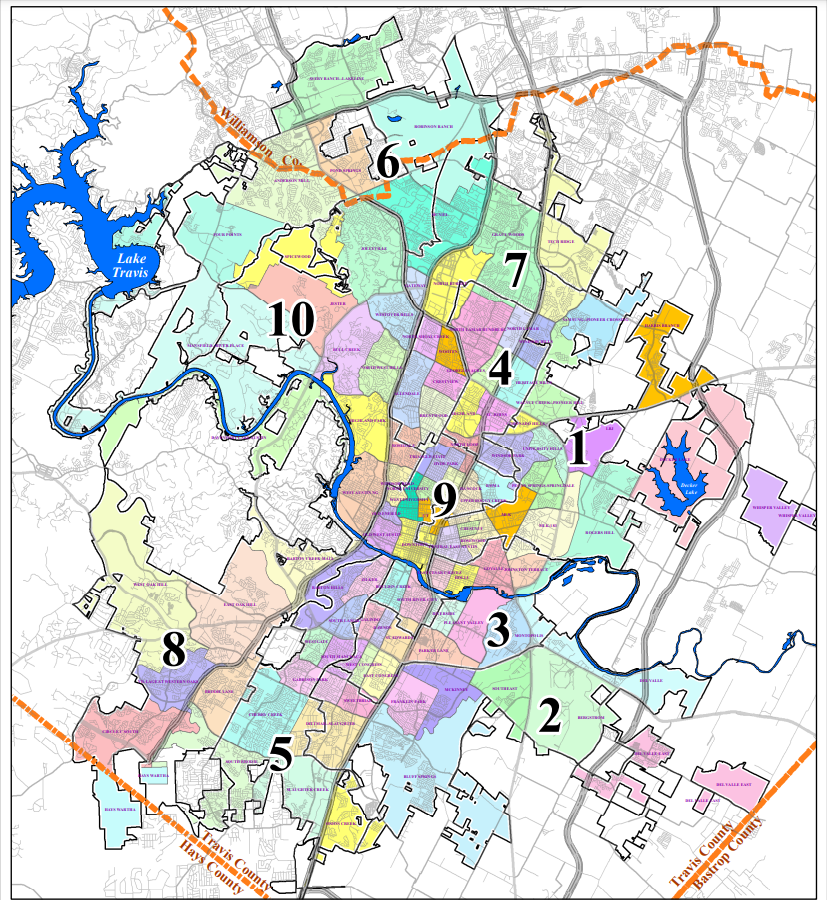

In [78]:
from IPython.display import Image
Image(filename='austin_council_districts.png') 


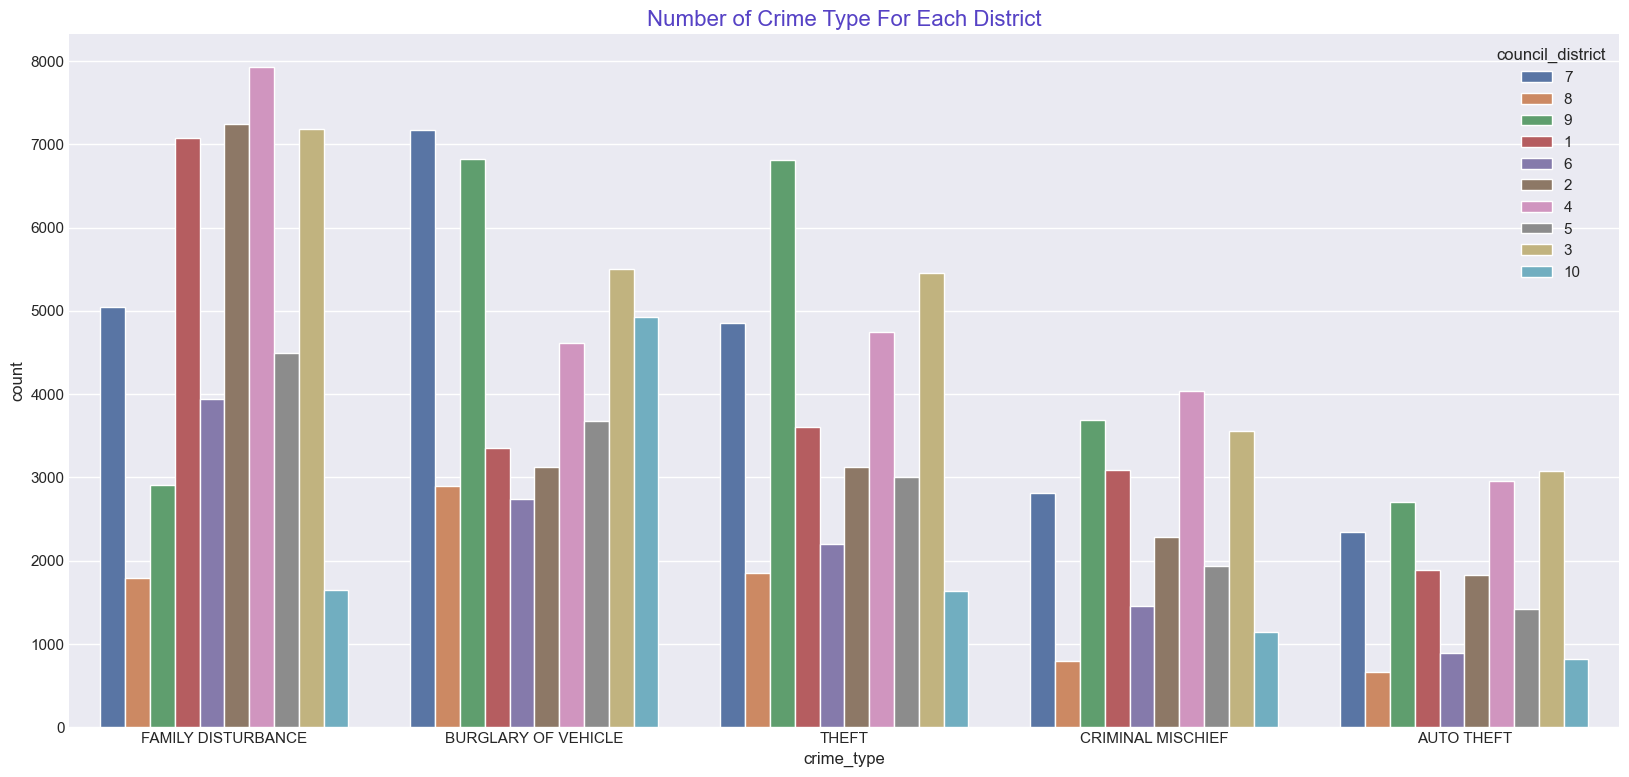

In [36]:
order = df_18_22["crime_type"].value_counts().head(5).index
sns.countplot(data = df_18_22, x = "crime_type", hue = "council_district", order = order)
plt.title("Number of Crime Type For Each District", fontsize = 16, color = "#5642C5");

#### I notice that for the council district 9, there are more instances of Burglary and Thefts. For council district 4 which is  close proximity with council district 9 displays more Family disturbance cases. 

### EDA on APD Sectors<a id='apd_sectors'>

In [81]:
df_18_22.sector.unique()

array(['ID', 'DA', 'GE', 'ED', 'AD', 'FR', 'CH', 'BA', 'HE', 'AP', None,
       'ADA<', '88', 'UT', 'CHAR', 'DAVID', 'HENR', 'ADAM', '4', '8',
       'EDWD', 'FRNK', 'HENRY', '8805', 'FRK'], dtype=object)

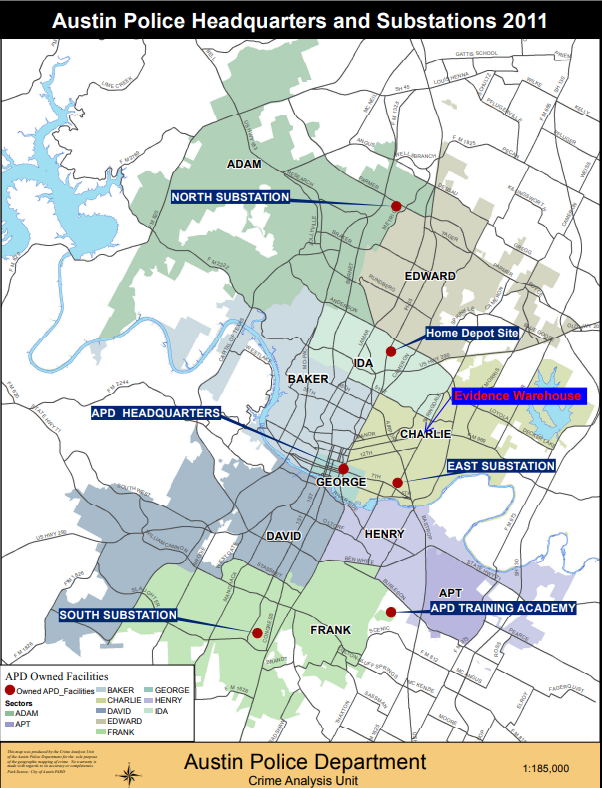

In [82]:
Image(filename='apd_sectors.png') 

There should be 10 sector names but I see more than 10 in the dataset. It might need wrangling.

In [84]:
df_18_22.sector.value_counts().head(10)

ED    69704
DA    61044
FR    58892
AD    57670
BA    51298
ID    48908
HE    48817
CH    48667
GE    28730
AP     2729
Name: sector, dtype: int64

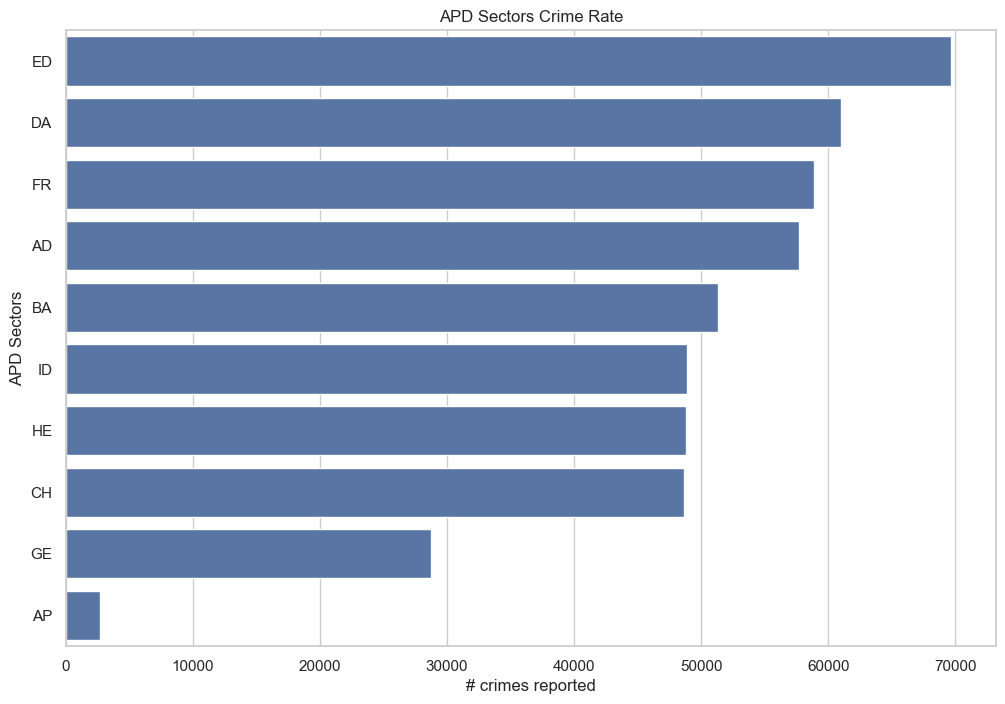

In [86]:
sector_based_crimes = df_18_22['sector'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=sector_based_crimes.index, x=sector_based_crimes.values,color='b')
g.set(xlabel='# crimes reported', ylabel='APD Sectors')
plt.title('APD Sectors Crime Rate')
plt.show()

### EDA on zip_codes <a id='zip_codes'>

In [108]:
#I will make a dataframe with ,crime_type,address, zip_code, state, country, latitide and longitude
# using tableau, I will get the visulaization of the zip codes on Austin map. 

df_crime_location = df_18_22.loc[:,['crime_type','address', 'zip_code','latitude','longitude']]


In [109]:
df_crime_location.shape

(478658, 5)

In [100]:
df_crime_location.head()

,crime_type,address,zip_code,latitude,longitude
10362,THEFT,1804 ULLRICH AVE,78756,30.33274275,-97.73728423
10363,ASSAULT W/INJURY-FAM/DATE VIOL,5121 CORNFLOWER DR,78739,30.16858378,-97.88899989
10364,EVADING / FOOT,NECHES ST / E 7TH ST,78701,30.267699,-97.73792112
10365,FAMILY DISTURBANCE,12433 DESSAU RD,78754,30.38973342,-97.64647729
10366,AGG ASSAULT WITH MOTOR VEH,8244 RESEARCH BLVD SB,78758,30.35570659,-97.71555725


In [101]:
df_crime_location['City'] = pd.Series(['Austin' for x in range(len(df_crime_location.index))])


In [102]:
df_crime_location.head()

,crime_type,address,zip_code,latitude,longitude,City
10362,THEFT,1804 ULLRICH AVE,78756,30.33274275,-97.73728423,Austin
10363,ASSAULT W/INJURY-FAM/DATE VIOL,5121 CORNFLOWER DR,78739,30.16858378,-97.88899989,Austin
10364,EVADING / FOOT,NECHES ST / E 7TH ST,78701,30.267699,-97.73792112,Austin
10365,FAMILY DISTURBANCE,12433 DESSAU RD,78754,30.38973342,-97.64647729,Austin
10366,AGG ASSAULT WITH MOTOR VEH,8244 RESEARCH BLVD SB,78758,30.35570659,-97.71555725,Austin


In [103]:
df_crime_location['State'] = pd.Series(['Texas' for x in range(len(df_crime_location.index))])

In [104]:
df_crime_location['Country'] = pd.Series(['United States' for x in range(len(df_crime_location.index))])

In [105]:
#saving this file
table_zip = pa.Table.from_pandas(df_crime_location, preserve_index=True)
pq.write_table(table_zip, 'crime_locations_zips.parquet')



In [106]:
#saving this file in csv format
csv_name = "crime_locations_zips.csv"
df_crime_location.to_csv(csv_name, index=False)

### Top 15 Zip codes for Crimes<a id='top_15_zips'>

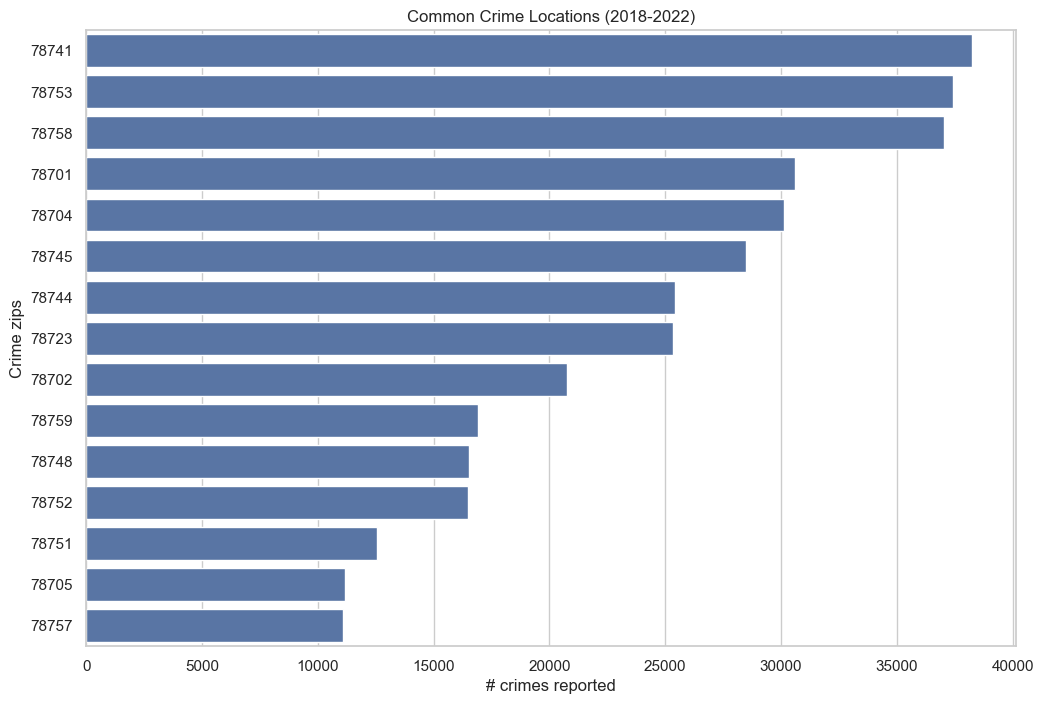

In [91]:
common_crime_spot = df_18_22['zip_code'].value_counts().head(15)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=common_crime_spot.index, x=common_crime_spot.values,color='b')
g.set(xlabel='# crimes reported', ylabel='Crime zips')
plt.title('Common Crime Locations (2018-2022)')
plt.show()

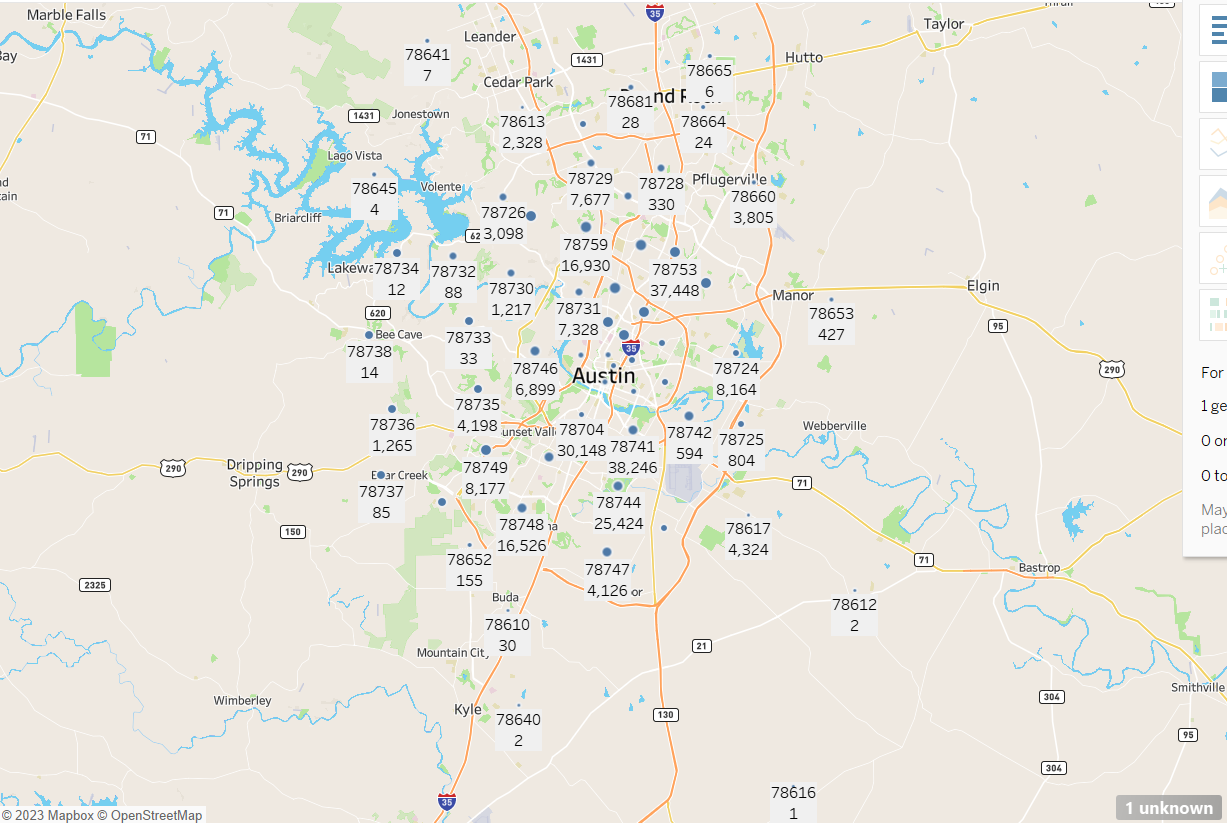

In [107]:
Image(filename='zip_cnt_tableau.png') 

By using crime_locations_zips.csv file I got the above map on tableau. Zip code and it total count for the years 2018-2022 have been illustrated. 

In [110]:
from datetime import datetime

df_18_22['day'] = df_18_22['occurred_date_time'].apply(lambda x: x.strftime('%A')) 

In [111]:
df_18_22.head()

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,longitude,location,clearance_status,clearance_date,occurred_date_time,reported_date_time,month,year,hour,day
10362,20238000022,THEFT,600,N,RESIDENCE / HOME,1804 ULLRICH AVE,78756,7,ID,7,...,-97.73728423,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-06T00:00:00.000,2022-12-31 23:55:00,2023-01-01 15:40:00,December,2022,23,Saturday
10363,202310559,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,RESIDENCE / HOME,5121 CORNFLOWER DR,78739,8,DA,8,...,-97.88899989,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-11T00:00:00.000,2022-12-31 23:50:00,2023-01-01 09:35:00,December,2022,23,Saturday
10364,20223651540,EVADING / FOOT,2723,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,NECHES ST / E 7TH ST,78701,9,GE,2,...,-97.73792112,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-01-01T00:00:00.000,2022-12-31 23:49:00,2022-12-31 23:49:00,December,2022,23,Saturday
10365,20223651539,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,12433 DESSAU RD,78754,1,ED,6,...,-97.64647729,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:48:00,2022-12-31 23:48:00,December,2022,23,Saturday
10366,20223651533,AGG ASSAULT WITH MOTOR VEH,406,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,8244 RESEARCH BLVD SB,78758,7,ID,7,...,-97.71555725,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:45:00,2022-12-31 23:52:00,December,2022,23,Saturday


### Crime Count Visualization(yearly,monthly,daily, hourly)<a id='daily_crime'>

In [112]:
crime_cnt_day = pd.DataFrame(data = df_18_22["day"].value_counts().reset_index().values,
                        columns = ["day", "crime_cnt"]).sort_values("day").reset_index(drop = True)

In [135]:
crime_cnt_hour = pd.DataFrame(data = df_18_22["hour"].value_counts().reset_index().values,
                        columns = ["hour", "crime_cnt"]).sort_values("hour").reset_index(drop = True)

In [136]:
crime_cnt_year = pd.DataFrame(data = df_18_22["year"].value_counts().reset_index().values,
                        columns = ["year", "crime_cnt"]).sort_values("year").reset_index(drop = True)

In [137]:
crime_cnt_month = pd.DataFrame(data = df_18_22["month"].value_counts().reset_index().values,
                        columns = ["month", "crime_cnt"]).sort_values("month").reset_index(drop = True)

In [114]:
crime_cnt_day

,day,crime_cnt
0,Friday,72713
1,Monday,68987
2,Saturday,69016
3,Sunday,67114
4,Thursday,66983
5,Tuesday,66659
6,Wednesday,67186


In [139]:
crime_cnt_hour.head(3)

,hour,crime_cnt
0,0,30351
1,1,18143
2,2,17683


In [140]:
crime_cnt_year.head()

,year,crime_cnt
0,2018,97928
1,2019,103068
2,2020,98824
3,2021,91544
4,2022,87294


In [141]:
crime_cnt_month.head(6)

,month,crime_cnt
0,April,38794
1,August,40978
2,December,39425
3,February,36331
4,January,39692
5,July,41060


In [154]:
fig = make_subplots(rows=2,cols=2, specs = [[{"type" : "scatter"}, {"type" : "scatter"}], [{"type" : "scatter"},
                             {"type" : "scatter"}]],
                   subplot_titles = ("# Crimes per Year", "# Crimes per Month", "# Crimes per Day", "# Crimes per Hour"))

In [156]:

fig.add_trace(
    go.Scatter(x=crime_cnt_year.year, y=crime_cnt_year.crime_cnt), row = 1, col = 1)
fig.add_trace(
    go.Scatter(x=crime_cnt_month.month, y=crime_cnt_month.crime_cnt), row = 1, col = 2)
fig.add_trace(
    go.Scatter(x=crime_cnt_day.day, y=crime_cnt_day.crime_cnt), row = 2, col = 1)
fig.add_trace(
    go.Scatter(x=crime_cnt_hour.hour, y=crime_cnt_hour.crime_cnt), row = 2, col = 2)

# Update x axes parameters
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Month", range=[0, 13], row=1, col=2)
fig.update_xaxes(title_text="Day", row=2, col=1)
fig.update_xaxes(title_text="Hour",row=2, col=2)

# Update y axes parameters
fig.update_yaxes(title_text="# of Crimes", row=1, col=1)
fig.update_yaxes(title_text="# of Crimes",row=1, col=2)
fig.update_yaxes(title_text="# of Crimes", row=2, col=1)
fig.update_yaxes(title_text="# of Crimes", row=2, col=2)

fig.update_layout(showlegend=False,title_text="Distributions of Total Crimes Between 2018-2022", height=900)

#### EDA on Clearance Status<a id='clearance_status'>

In [157]:
df_18_22['clearance_status'].value_counts()

N    336759
C     84408
O      1884
Name: clearance_status, dtype: int64

### Time Series Analysis<a id='ts_analysis'>

In [159]:
crime_cnt_month.head()

,month,crime_cnt
0,April,38794
1,August,40978
2,December,39425
3,February,36331
4,January,39692


In [160]:
crime_cnt_month.dtypes

month        object
crime_cnt    object
dtype: object

In [166]:
df_18_22['year_month'] = pd.to_datetime(df_18_22['occurred_date_time']).dt.strftime('%Y-%m')

In [167]:
df_18_22.head()

,incident_report_number,crime_type,ucr_code,family_violence,location_type,address,zip_code,council_district,sector,district,...,location,clearance_status,clearance_date,occurred_date_time,reported_date_time,month,year,hour,day,year_month
10362,20238000022,THEFT,600,N,RESIDENCE / HOME,1804 ULLRICH AVE,78756,7,ID,7,...,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-06T00:00:00.000,2022-12-31 23:55:00,2023-01-01 15:40:00,December,2022,23,Saturday,2022-12
10363,202310559,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,RESIDENCE / HOME,5121 CORNFLOWER DR,78739,8,DA,8,...,"{'human_address': '{""address"": """", ""city"": """",...",N,2023-01-11T00:00:00.000,2022-12-31 23:50:00,2023-01-01 09:35:00,December,2022,23,Saturday,2022-12
10364,20223651540,EVADING / FOOT,2723,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,NECHES ST / E 7TH ST,78701,9,GE,2,...,"{'human_address': '{""address"": """", ""city"": """",...",C,2023-01-01T00:00:00.000,2022-12-31 23:49:00,2022-12-31 23:49:00,December,2022,23,Saturday,2022-12
10365,20223651539,FAMILY DISTURBANCE,3400,N,RESIDENCE / HOME,12433 DESSAU RD,78754,1,ED,6,...,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:48:00,2022-12-31 23:48:00,December,2022,23,Saturday,2022-12
10366,20223651533,AGG ASSAULT WITH MOTOR VEH,406,N,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,8244 RESEARCH BLVD SB,78758,7,ID,7,...,"{'human_address': '{""address"": """", ""city"": """",...",None,None,2022-12-31 23:45:00,2022-12-31 23:52:00,December,2022,23,Saturday,2022-12


In [170]:
df_18_22.groupby(['year_month'])['crime_type'].count().to_frame('count')\
.sort_values(by=['year_month','count'],ascending=([True,False]))

,count
year_month,
2018-01,7771
2018-02,7175
2018-03,8357
2018-04,8051
2018-05,8235
2018-06,8364
2018-07,8351
2018-08,8528
2018-09,8218


In [171]:
ts_year_month = df_18_22.groupby(['year_month'])['crime_type'].count().to_frame('count')\
.sort_values(by=['year_month','count'],ascending=([True,False]))

In [172]:
ts_year_month.head()

,count
year_month,
2018-01,7771
2018-02,7175
2018-03,8357
2018-04,8051
2018-05,8235


In [175]:
ts_year_month.columns

Index(['count'], dtype='object')

In [176]:
ts_year_month.reset_index(inplace = True)


In [177]:
ts_year_month.head()

,year_month,count
0,2018-01,7771
1,2018-02,7175
2,2018-03,8357
3,2018-04,8051
4,2018-05,8235


In [178]:
ts_year_month['Month'] = pd.to_datetime(ts_year_month['year_month'])

In [179]:
ts_year_month.head()

,year_month,count,Month
0,2018-01,7771,2018-01-01
1,2018-02,7175,2018-02-01
2,2018-03,8357,2018-03-01
3,2018-04,8051,2018-04-01
4,2018-05,8235,2018-05-01


In [180]:
ts_year_month.set_index('Month',inplace=True)

In [181]:
ts_year_month.head()

,year_month,count
Month,,
2018-01-01,2018-01,7771
2018-02-01,2018-02,7175
2018-03-01,2018-03,8357
2018-04-01,2018-04,8051
2018-05-01,2018-05,8235


In [182]:
ts_year_month.drop('year_month',axis=1,inplace=True)

In [183]:
ts_year_month.head()

,count
Month,
2018-01-01,7771
2018-02-01,7175
2018-03-01,8357
2018-04-01,8051
2018-05-01,8235


In [184]:
ts_year_month.rename(columns={'count': 'Crime_Count'}, inplace=True) 

In [187]:
ts_year_month.columns

Index(['Crime_Count'], dtype='object')

In [188]:
ts_year_month.shape

(60, 1)

### Making a predictor variable y<a id='making_predictor'>

In [189]:
y = ts_year_month['Crime_Count']

In [190]:
display(type(y), y.dtype)

pandas.core.series.Series

dtype('int64')

### Getting summary statistics<a id='ts_summary_statistics'>

In [191]:
ts_year_month.describe()

,Crime_Count
count,60.000000
mean,7977.633333
std,616.286692
min,6433.000000
25%,7530.000000
50%,8116.500000
75%,8467.750000
max,9107.000000


<AxesSubplot:xlabel='Month'>

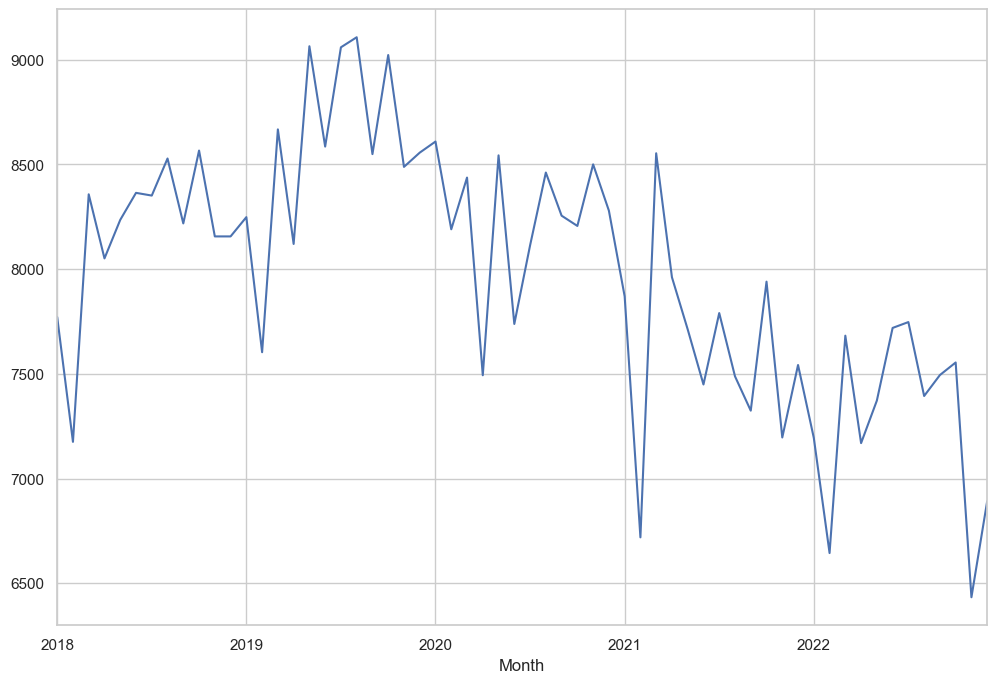

In [192]:
y.plot()

### Observations<a id='y_plot_obs'>

I notice a downward trend with some seasonality and noise. 

### Decomposition<a id='decomposition_ts'>

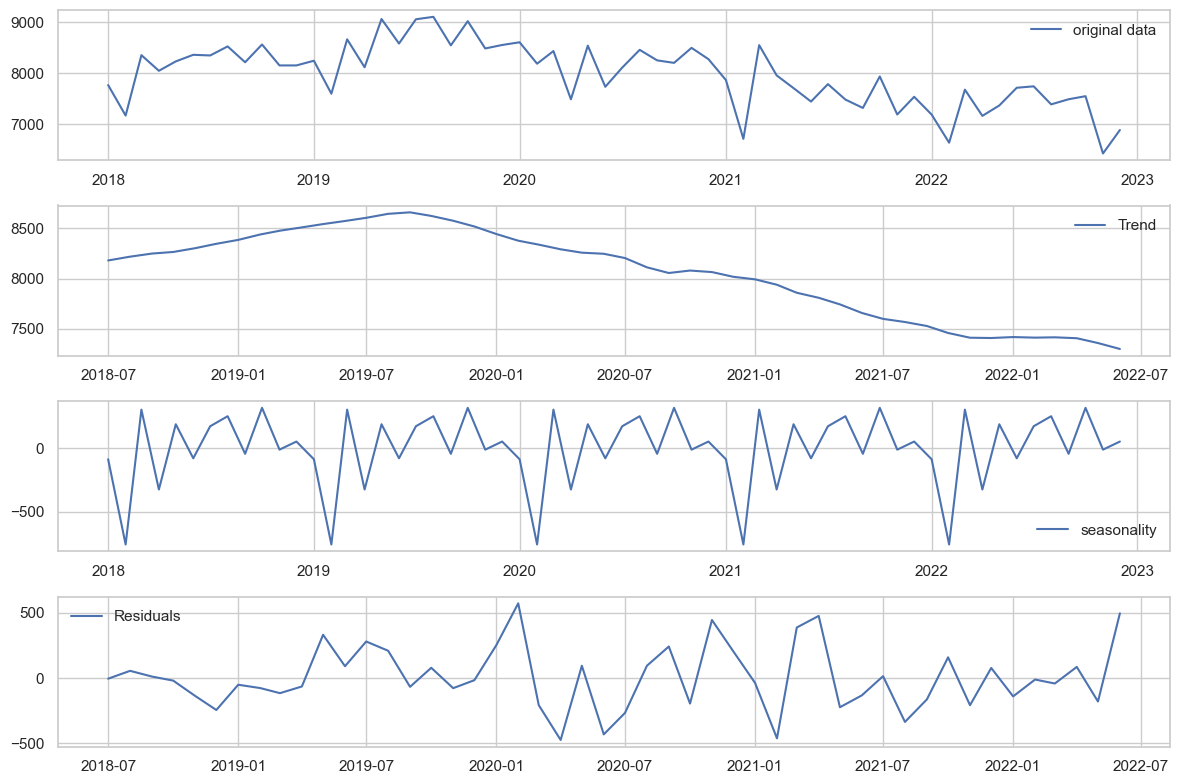

In [193]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition= seasonal_decompose(y)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'original data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [194]:
#saving this file
table_18_22 = pa.Table.from_pandas(df_18_22, preserve_index=True)
pq.write_table(table_18_22, 'crime_18_22.parquet')


### Summary of EDA<a id='summary'>

(2) Exploratory Data Analysis (EDA):...........................................

I noticed null values for zip_code, latitude,longitude, clearance_status, clearance_date.
There are 1764 records with null values for these aboe mentioned records. However, for my analysis this will not cause any impact. <br/>

Fortunately, I did not see any missing values for date columns. <br/>

I noticed some zip codes 78741 showed more crimes. Mostly in downtown area and UT Austin zone. Explored in what year the crime rate is high which showed 2008 as the year with highest crimes

<br/> It was good to see a decline in the crime rate which proves the efficiency of APD. 

<br/>in EDA, I strated little bit on doing Time series analysis for the data which has years from 2018-2022. 